<h2><center><font color=blue>Executive Summary</font></center></h2>
<br/><br/>

<p style="font-size:16px;line-height:2.5em;">In recent years, a proliferation of advanced forecasting methodologies has emerged to address the escalating complexity and heterogeneity of managerial forecasting challenges. Each technique serves a distinct purpose, necessitating the strategic selection of the most suitable approach for the task at hand. In this analysis, I systematically examined key assumptions and executed a structured series of steps aimed at resolving critical questions in time series forecasting, such as identifying regularities or systematic variations attributable to seasonality, detecting cyclical patterns recurring over multi-year intervals, and capturing underlying trends in the dataset. To ensure data integrity, I meticulously addressed issues of non-stationarity and other inconsistencies through preprocessing techniques, including logarithmic transformation. Leveraging statistical diagnostics like the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF), I determined the optimal model specification. Based on these diagnostics, I selected ARIMA and Seasonal ARIMA (SARIMA) models as the most suitable frameworks for this problem. Model parameters were fine-tuned using the Akaike Information Criterion (AIC), leading to the selection of p=10, d=1, and q=3. With this configuration, I forecasted production for the next four quarters, ensuring predictions were generated with minimal AIC, thereby optimizing model accuracy and reliability.</p>
    

<br/><br/>

<h1><center><font color=blue>Table of Contents</font></center></h1><a class="anchor" id="tbc"></a>

* [Chapter 1: Introduction](#chapter1)
    * [1.1 Background of the Report](#section_1_1)
    * [1.2 Problem Statement](#Section_1_2)
    * [1.3 Hardware and Software Used](#Section_1_3)
* [Chapter 2: Analysis And Interpretation of the Timeseries Problem](#Chapter2)
    * [2.1 Forecasting](#Section_2_1)
    * [2.1.1 Methodology and Assumptions](#Section_2_1_1)
    * [2.1.2 Understanding the Data](#Section_2_1_2)
    * [2.2.1 Data Preprocessing](#Section_2_2_1)
    * [2.3.1 Building Forecasting Model](#Section_2_3_1)
        * [2.3.1.1 Seasonal ARIMA Model](#Section_2_3_1_1)
        * [2.3.1.2 ARIMA Model](#Section_2_3_1_2)
* [Chapter 3: Findings](#Chapter3)
    * [3.1 Business Implication](#Section_3_1)

# Chapter 1: Introduction <a class="anchor" id="chapter1"></a>

[Go Back To Table Of Content](#tbc)

<br></br>


## 1.1 Background of the Report <a class="anchor" id="section_1_1"></a>

<br></br>
<p style="font-size:16px;line-height:2.5em;">The primary objective of this report is to develop a robust time series model capable of accurately forecasting production levels for the next four quarters. This involves analyzing historical production data to uncover patterns, trends, and seasonal behaviors that influence production outcomes. The process includes preprocessing the data to address issues such as non-stationarity, leveraging statistical techniques to identify key parameters, and evaluating various model configurations to select the most effective forecasting approach. Ultimately, the aim is to provide actionable insights and reliable projections to support strategic decision-making and operational planning for the upcoming quarters.</p>

## 1.2 Problem Statement <a class="anchor" id="Section_1_2"></a>

<br></br>
<p style="font-size:16px;line-height:2.5em;">Accurate production forecasting is critical for optimizing resource allocation, supply chain management, and meeting market demand. The objective of this study is to develop a time series forecasting model capable of predicting production levels for the next four quarters. The challenge lies in identifying and modeling complex patterns, such as trends, seasonality, and cyclical variations, while addressing issues like non-stationarity and data discrepancies. By leveraging statistical and machine learning techniques, this report aims to provide a reliable forecasting solution that minimizes errors and supports informed decision-making for production planning and operational efficiency.</p>


## 1.3 Hardware and Software Used <a class="anchor" id="Section_1_3"></a>

<br></br>
<p>
 Hardware:
    <ul style="line-height:2.5em;">
  <li>Processor: Intel® Core™ i7-10510U CPU @ 1.80GHz 2.30 GHz</li>
  <li>Installed memory (RAM) : 64.0 GB (63.8 GB useable)</li>
  <li>System type: 64-bit Operating System, x64-based processor</li>
  <li>Pen and Touch: Pen and Touch Support with 10 Touch Points</li>
    </ul> 

 	
 	
 	

Software and Packages:
    <ul style="line-height:2.5em;">
  <li>To do this analysis, I have used Python 3.</li>
  <li>I have used Jupiter notebook as IDE.</li>
  <li>I have used pandas, numpy for data preparation.</li>
  <li>I have used seaborn, matplotlib, plotly and cufflings for data visualization.</li>
  <li>I have used ScikitLearn for building Machine Learning Algorithm.</li>
    </ul>  	
</p>

# Analysis And Interpretation of the Timeseries Problem <a class="anchor" id="Chapter2"></a>

[Go Back To Table Of Content](#tbc)

## 2.1 Forecasting <a class="anchor" id="Section_2_1"></a>

2.1.1 Methodology and Assumptions <a class="anchor" id="Section_2_1_1"></a>
<br></br>

<p style="font-size:16px;line-height:2.5em;">The methodology and assumptions adopted for building the forecasting model are as follows: <ul style="line-height:2.5em;"> <li> **Initial Data Exploration:** I began by examining the dataset to understand its structure, including its shape, dimensions, and key statistical properties, ensuring a comprehensive overview before analysis.</li> <li> **Data Preparation for Time Series Analysis:** As the dataset pertains to time series, I transformed the relevant column to a `datetime` format and set it as the index to facilitate chronological data handling and analysis.</li> <li> **Data Cleaning:** I carefully inspected the dataset for any discrepancies, such as missing values, and addressed them to ensure the data's integrity and reliability.</li> <li> **Exploratory Visualization:** Various visualizations were employed throughout the process to better interpret the data, uncover patterns, and guide preprocessing steps necessary for model readiness.</li> <li> **Key Component Analysis:** I assessed critical time series components, including stationarity, seasonality, and residuals, to determine the dataset's underlying patterns and inform model selection.</li> <li> **Lag Identification:** An autocorrelation plot was utilized to identify appropriate lag values that could be integrated into the model for capturing temporal dependencies effectively.</li> <li> **Model Parameter Selection:** The ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) tests were performed to determine the suitable values for model parameters p, d, and q.</li> <li> **Model Development:** Based on the insights, I developed two forecasting models tailored to the problem: an ARIMA (AutoRegressive Integrated Moving Average) model and a Seasonal ARIMA (SARIMA) model to account for both seasonal and non-seasonal patterns in the data.</li> <li> **Forecasting:** Using the selected models, I projected production for the next five years, providing actionable insights for long-term planning and decision-making.</li> </ul> </p>

### 2.1.2 Understanding the Data <a class="anchor" id="Section_2_1_2"></a>

In [1]:
#Importing all the packages that I will be needing

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from plotly import __version__
from plotly.offline import download_plotlyjs,init_notebook_mode,iplot,plot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()
import plotly.io as pio
pio.renderers
pio.renderers.default = "svg"
from tqdm import tqdm_notebook as tqdm
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA
pd.plotting.register_matplotlib_converters()
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import itertools
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV,RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set(rc={'figure.figsize':(8,8)})

In [2]:
#Importing data that I will be working on

df = pd.read_csv('data_A.csv')

In [3]:
# Getting some idea about the dataset

df.head()

,time,production
0,1956 Q1,284
1,1956 Q2,213
2,1956 Q3,227
3,1956 Q4,308
4,1957 Q1,262


In [4]:
# Getting some idea about the dataset

df.tail()

,time,production
213,2009 Q2,398
214,2009 Q3,419
215,2009 Q4,488
216,2010 Q1,414
217,2010 Q2,374


In [5]:
# Checking the number of observations

len(df)

218

In [6]:
# Looking into all the variables and their data type

data = pd.DataFrame(columns=['Column_Name', 'Data_Type'])
data_col = []
data_type = []

for i in df.columns:
        
    data_col.append(i)
    data_type.append(df[i].dtypes)
    
data['Column_Name']= data_col
data['Data_Type']= data_type
    
data

,Column_Name,Data_Type
0,time,object
1,production,int64


In [7]:
'''
1. Here, as the data type of the "time" column is object, I will convert it to datetime which is required by the timeseries 
   analysis.

2. As the data shown in the "time" column quarterly basis, I am going to start from January 1 to represent the first quarter
   of the year to October 1 to represent the fourth quarter of the year.

3. I am going to convert the "time" column as index column of this dataset.

'''


df.time = df.time.str.replace(' Q1', '-01-01', regex=False)
df.time = df.time.str.replace(' Q2', '-04-01', regex=False)
df.time = df.time.str.replace(' Q3', '-07-01', regex=False)
df.time = df.time.str.replace(' Q4', '-10-01', regex=False)
df['time'] = pd.to_datetime(df['time'],format='%Y-%m-%d')
df.set_index('time',inplace=True)
df.head()

,production
time,
1956-01-01,284
1956-04-01,213
1956-07-01,227
1956-10-01,308
1957-01-01,262


In [8]:
# Getting some statistics about the variables and observations

df.describe()

,production
count,218.00
mean,415.37
std,85.88
min,213.00
25%,379.25
50%,422.00
75%,465.75
max,599.00


In [9]:
def findMissingValue(df):
    # Calculate the number of missing values per column
    missing_values = df.isnull().sum()

    # Calculate the percentage of missing values
    percent_missing = (missing_values / len(df)) * 100

    # Create a DataFrame with the results
    missing_data = pd.DataFrame({
        'Columns': df.columns,
        'Number_Of_MValue': missing_values,
        'Percentage_Of_MValue': percent_missing.round(2)
    })

    # Filter out columns with no missing data and sort
    missing_data = missing_data[missing_data['Number_Of_MValue'] > 0].sort_values('Number_Of_MValue', ascending=False).reset_index(drop=True)

    return missing_data


In [10]:
# Checking if we have any missing values in our dataset

findMissingValue(df)

,Columns,Number_Of_MValue,Percentage_Of_MValue


### 2.2.1 Data Preprocessing <a class="anchor" id="Section_2_2_1"></a>

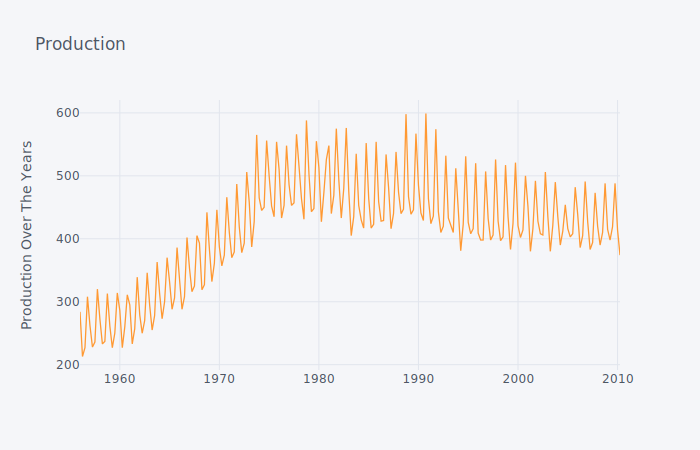

In [11]:
# Plotting the data to visualize properly

df.iplot(title='Production',yTitle='Production Over The Years')

In [12]:
# Testing For Stationarity

#Ho: It is non stationary
#H1: It is stationary


def stationarity_test(df):
    
    # Testing rolling statistics
    
    movingAverage = df.rolling(window=4).mean()
    movingSTD = df.rolling(window=4).std()

    # Plotting rolling statistics
    
    orig = plt.plot(df,color='blue',label='Original')
    mean = plt.plot(movingAverage, color='red',label='Rolling Mean')
    std = plt.plot(movingSTD,color='black',label='Rolling STD')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Testing Dickey-Fuller test
    
    print('Results of Dickey-Fuller Test')
    df_test = adfuller(df['production'],autolag='AIC')
    df_output = pd.Series(df_test[0:4],index=['Test Statistics','p-value','Number of Lags Used','Number of Observations Used'])
    
    for key,value in df_test[4].items():
        df_output['Critical Value (%s)'%key] = value
    

    print(df_output)
    
    if df_test[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

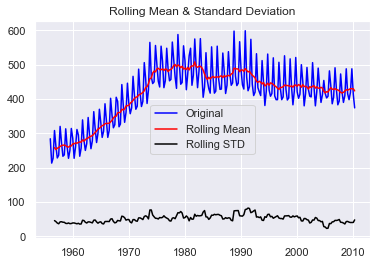

Results of Dickey-Fuller Test
Test Statistics                -2.61
p-value                         0.09
Number of Lags Used            14.00
Number of Observations Used   203.00
Critical Value (1%)            -3.46
Critical Value (5%)            -2.88
Critical Value (10%)           -2.57
dtype: float64
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [13]:
# Calling the function to check the stationarity

stationarity_test(df)

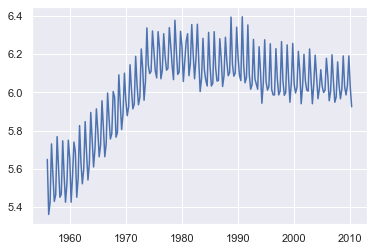

In [14]:
# Estimating trend

df_log = np.log(df)
plt.plot(df_log)

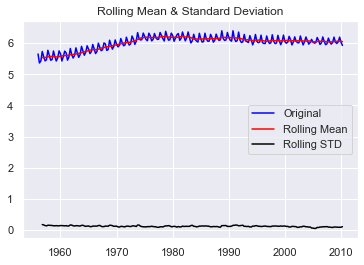

Results of Dickey-Fuller Test
Test Statistics                -2.98
p-value                         0.04
Number of Lags Used            14.00
Number of Observations Used   203.00
Critical Value (1%)            -3.46
Critical Value (5%)            -2.88
Critical Value (10%)           -2.57
dtype: float64
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [15]:
# Calling the function to check the stationarity

stationarity_test(df_log)

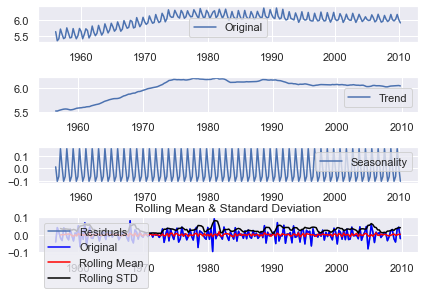

Results of Dickey-Fuller Test
Test Statistics                -8.17
p-value                         0.00
Number of Lags Used            11.00
Number of Observations Used   202.00
Critical Value (1%)            -3.46
Critical Value (5%)            -2.88
Critical Value (10%)           -2.57
dtype: float64
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [16]:
# Checking the seasonal decomposition and residuals

from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


plt.subplot(411)
plt.plot(df_log, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()
         
decom_df = residual
decom_df.dropna(inplace=True)
stationarity_test(decom_df)

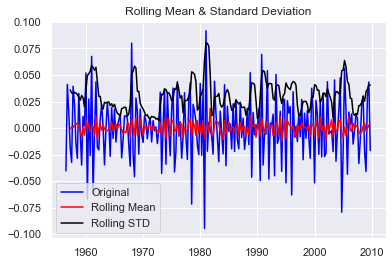

Results of Dickey-Fuller Test
Test Statistics                -8.17
p-value                         0.00
Number of Lags Used            11.00
Number of Observations Used   202.00
Critical Value (1%)            -3.46
Critical Value (5%)            -2.88
Critical Value (10%)           -2.57
dtype: float64
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [17]:
# Checking stationarity on residuals

decom_df = residual
decom_df.dropna(inplace=True)
stationarity_test(decom_df)

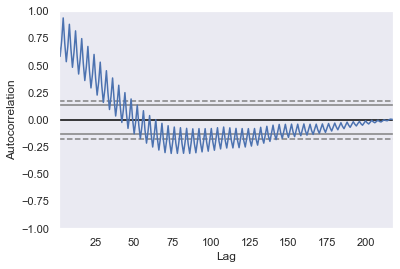

In [18]:
# Plotting autocorrelation

autocorrelation_plot(df_log['production'])
plt.show()

#### Key components of time series models


<p style="font-size:16px;line-height:2.5em;">Identification of an AR model is often best done with the PACF.</p>
<ul style=line-height:2.5em;>
<li>For an AR model, the theoretical PACF “shuts off” past the order of the model. The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point. Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. By the “order of the model” we mean the most extreme lag of x that is used as a predictor.</li>  
</ul>
<p style="font-size:16px;line-height:2.5em;">Identification of an MA model is often best done with the ACF.</p>
<ul style=line-height:2.5em;>
<li>For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model.</li>
</ul>
<p style="font-size:16px;line-height:2.5em;">Here, p AR model lags, d differencing, and q MA lags.</p>


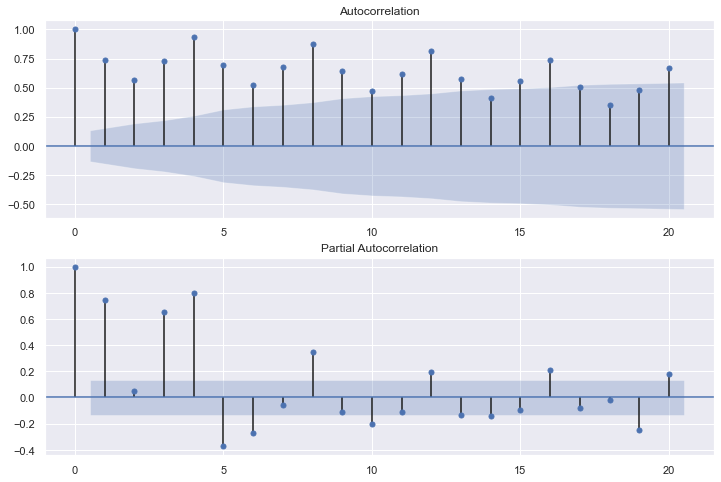

In [19]:
# Finding out the value for p,d and q with ACF and PACF testing

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_log['production'].iloc[1:],lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_log['production'].iloc[1:],lags=20,ax=ax2)

In [20]:
#Parameter Selection for the ARIMA Time Series Model
#Our first goal is to find the values of ARIMA(p,d,q)
#We will use a "grid search" to iteratively explore different combinations of parameters. 
#For each combination of parameters, we fit a new  ARIMA model.
p = range(1,15)
d = range(1,4)
q = range(0,4)
# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))
print(len(pdq))

168


In [21]:
'''
When evaluating and comparing statistical models fitted with different parameters, 
each can be ranked against one another based on how well it fits the data or its ability to accurately predict future data 
points.
We will use the AIC (Akaike Information Criterion) value, which is conveniently returned with ARIMA models fitted using 
statsmodels.
warnings.filterwarnings("ignore") # specify to ignore warning messages
'''
x = df.production.values
aic=[]
param1=[]

for param in tqdm(pdq):
    
    try:
        model = ARIMA(x,order=param)
        model_fit = model.fit(disp=0)
        a = model_fit.aic
        param1.append(param)
        aic.append(a)
        print('ARIMA{} - AIC:{}'.format(param,a ))
    except:
        continue
mini = min(aic)
index = aic.index(mini)
print('Selected ARIMA model is ARIMA{} - AIC:{}'.format(param1[index],mini))

  0%|          | 0/168 [00:00<?, ?it/s]

ARIMA(1, 1, 0) - AIC:2440.05002619141
ARIMA(1, 1, 1) - AIC:2326.871255677751
ARIMA(1, 1, 2) - AIC:2261.3381382411344
ARIMA(1, 1, 3) - AIC:2233.2333615647244
ARIMA(1, 2, 0) - AIC:2602.9860107130053
ARIMA(1, 2, 2) - AIC:2314.62821458335
ARIMA(1, 2, 3) - AIC:2311.6514132976426
ARIMA(2, 1, 0) - AIC:2325.971676990843
ARIMA(2, 1, 1) - AIC:2187.388785379876
ARIMA(2, 1, 2) - AIC:2061.1476258359066
ARIMA(2, 1, 3) - AIC:1993.147041067357
ARIMA(2, 2, 0) - AIC:2544.6012046716824
ARIMA(2, 2, 2) - AIC:2188.730364290611
ARIMA(3, 1, 0) - AIC:1902.8886535056213
ARIMA(3, 1, 1) - AIC:1904.8882386372743
ARIMA(3, 1, 2) - AIC:1867.2930528947982
ARIMA(3, 1, 3) - AIC:1867.7153798992767
ARIMA(3, 2, 0) - AIC:2039.1988778617733
ARIMA(3, 2, 1) - AIC:1886.77347397694
ARIMA(3, 2, 2) - AIC:1884.0571980364584
ARIMA(3, 2, 3) - AIC:1861.7204510899664
ARIMA(4, 1, 0) - AIC:1904.8880120223093
ARIMA(4, 1, 1) - AIC:1906.5304419735394
ARIMA(4, 1, 2) - AIC:1868.7729355059569
ARIMA(4, 1, 3) - AIC:1851.3032898859688
ARIMA(4, 2,

### 2.3.1 Building Forecasting Model <a class="anchor" id="Section_2_3_1"></a>

#### 2.3.1.1 Seasonal ARIMA Model <a class="anchor" id="Section_2_3_1_1"></a>

In [22]:
model=sm.tsa.statespace.SARIMAX(df_log['production'],order=(10, 1, 3),seasonal_order=(1,1,1,4))
results=model.fit()

In [23]:
df_log['forecast']=results.predict(start=200,end=217,dynamic=True)

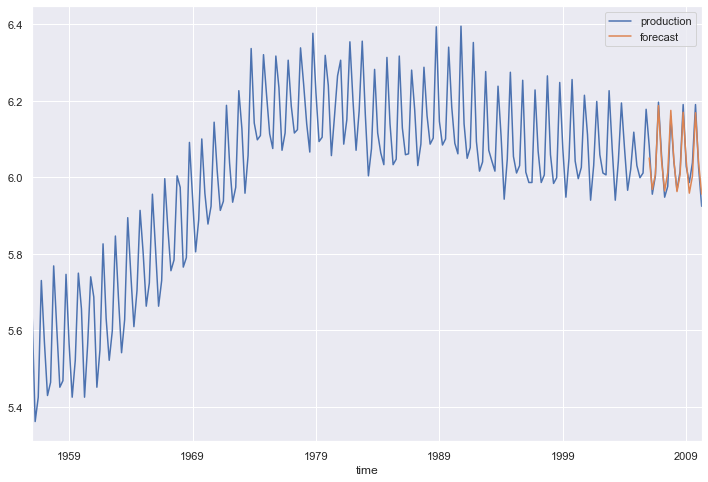

In [24]:
pd.plotting.register_matplotlib_converters()

df_log[['production','forecast']].plot(figsize=(12,8))

In [25]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                         production   No. Observations:                  218
Model:             SARIMAX(10, 1, 3)x(1, 1, 1, 4)   Log Likelihood                 413.220
Date:                            Sun, 12 Dec 2021   AIC                           -794.440
Time:                                    23:40:16   BIC                           -740.659
Sample:                                01-01-1956   HQIC                          -772.705
                                     - 04-01-2010                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4633      3.558     -0.130      0.896      -7.437       6.510
ar.L2         -0.1883      4.467     -0.042      0.966      -8.944       8.567
ar.L3          0.0754      1.985      0.038      0.970      -3.814       3.965
ar.L4          0.2683      1.233      0.218      0.828      -2.147       2.684
ar.L5          0.1243      1.525      0.082      0.935      -2.865       3.114
ar.L6          0.0800      1.199      0.067      0.947      -2.269       2.429
ar.L7         -0.0039      0.327     -0.012      0.991      -0.645       0.637
ar.L8         -0.1616      0.306     -0.529      0.597      -0.761       0.437
ar.L9         -0.0100      0.724     -0.014      0.989      -1.429       1.409
ar.L10        -0.0628      0.716     -0.088      0.930      -1.467       1.342
ma.L1         -0.4939      3.565     -0.139      0.890      -7.482       6.494
ma.L2          0.0640      4.210      0.015      0.988      -8.187       8.315
ma.L3         -0.0852      2.347     -0.036      0.971      -4.686       4.515
ar.S.L4       -0.2171      0.751     -0.289      0.773      -1.689       1.255
ma.S.L4       -0.6839      0.167     -4.092      0.000      -1.012      -0.356
sigma2         0.0012      0.000      9.313      0.000       0.001       0.001
===================================================================================
Ljung-Box (Q):                       31.70   Jarque-Bera (JB):                 1.24
Prob(Q):                              0.82   Prob(JB):                         0.54
Heteroskedasticity (H):               0.97   Skew:                            -0.19
Prob(H) (two-sided):                  0.88   Kurtosis:                         3.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### 2.3.1.2 ARIMA Model <a class="anchor" id="Section_2_3_1_2"></a>

In [26]:
# Building ARIMA model

model=ARIMA(df_log['production'],order=(10,1,3))
model_fit=model.fit()

In [27]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.production   No. Observations:                  217
Model:                ARIMA(10, 1, 3)   Log Likelihood                 416.722
Method:                       css-mle   S.D. of innovations              0.035
Date:                Sun, 12 Dec 2021   AIC                           -803.443
Time:                        23:40:48   BIC                           -752.745
Sample:                    04-01-1956   HQIC                          -782.963
                         - 04-01-2010                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0021      0.001      1.516      0.131      -0.001       0.005
ar.L1.D.production     -1.8576        nan        nan        nan         nan         nan
ar.L2.D.production     -2.2003        nan        nan        nan         nan         nan
ar.L3.D.production     -2.2020        nan        nan        nan         nan         nan
ar.L4.D.production     -1.0349        nan        nan        nan         nan         nan
ar.L5.D.production      0.0221        nan        nan        nan         nan         nan
ar.L6.D.production      0.6395        nan        nan        nan         nan         nan
ar.L7.D.production      0.8232        nan        nan        nan         nan         nan
ar.L8.D.production      0.6574        nan        nan        nan         nan         nan
ar.L9.D.production      0.4557        nan        nan        nan         nan         nan
ar.L10.D.production     0.1784        nan        nan        nan         nan         nan
ma.L1.D.production      0.9252        nan        nan        nan         nan         nan
ma.L2.D.production      0.7928        nan        nan        nan         nan         nan
ma.L3.D.production      0.7938        nan        nan        nan         nan         nan
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             1.2217           -0.0000j            1.2217           -0.0000
AR.2            -0.0015           -1.0004j            1.0004           -0.2502
AR.3            -0.0015           +1.0004j            1.0004            0.2502
AR.4             0.4669           -1.2218j            1.3080           -0.1919
AR.5             0.4669           +1.2218j            1.3080            0.1919
AR.6            -0.5907           -1.0924j            1.2419           -0.3289
AR.7            -0.5907           +1.0924j            1.2419            0.3289
AR.8            -1.2619           -0.3776j            1.3171           -0.4537
AR.9            -1.2619           +0.3776j            1.3171            0.4537
AR.10           -1.0017           -0.0000j            1.0017           -0.5000
MA.1            -1.0412           -0.0000j            1.0412           -0.5000
MA.2             0.0213           -1.0997j            1.0999           -0.2469
MA.3             0.0213           +1.0997j            1.0999            0.2469
------------------------------------------------------------------------------
"""

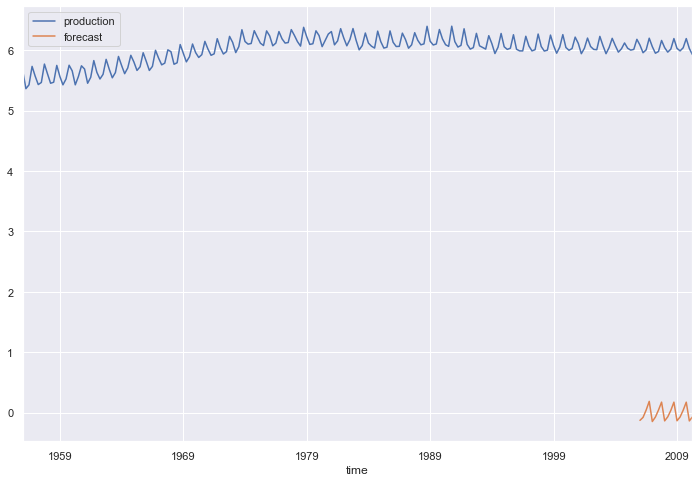

In [28]:
# Testing the model

df_log['forecast']=model_fit.predict(start=200,end=217,dynamic=True)
df_log[['production','forecast']].plot(figsize=(12,8))

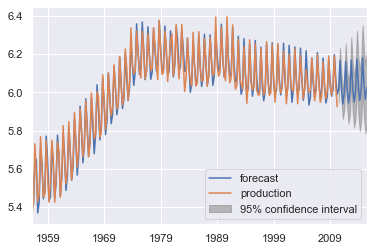

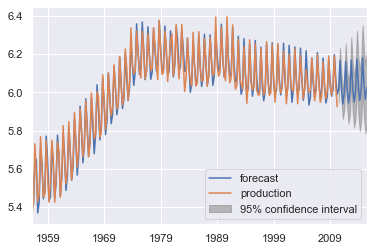

In [29]:
# Predicting next five years' production

model_fit.plot_predict(1,238)

In [30]:
model_fit.forecast(steps=20)

(array([6.01375219, 6.16547959, 6.02347387, 5.93925242, 5.99718462,
        6.16019624, 6.02165647, 5.94478744, 6.00075894, 6.1670358 ,
        6.02256688, 5.94907454, 6.00950546, 6.1733932 , 6.02891163,
        5.95615352, 6.01754496, 6.1804751 , 6.03687427, 5.96395543]),
 array([0.03455516, 0.0346341 , 0.03718998, 0.0400831 , 0.04614259,
        0.04836867, 0.05208319, 0.05510194, 0.05989364, 0.06287306,
        0.06538723, 0.06853958, 0.07338078, 0.07571558, 0.07801887,
        0.08093416, 0.08516341, 0.08725443, 0.08944714, 0.09197037]),
 array([[5.94602531, 6.08147906],
        [6.097598  , 6.23336117],
        [5.95058286, 6.09636489],
        [5.86069099, 6.01781384],
        [5.9067468 , 6.08762243],
        [6.06539538, 6.25499709],
        [5.91957529, 6.12373764],
        [5.83678962, 6.05278525],
        [5.88336957, 6.11814832],
        [6.04380686, 6.29026474],
        [5.89441028, 6.15072349],
        [5.81473943, 6.08340965],
        [5.86568178, 6.15332914],
        [6

<br></br>

# Chapter 3: Business Implication <a class="anchor" id="Chapter3"></a>

[Go Back To Table Of Content](#tbc)

### 3.1 Business Implication <a class="anchor" id="Section_3_1"></a>
[Go Back To Table Of Content](#tbc)

<br></br>

<ul>
  <li>This model will be able to predict the production for next few quarters and also labor force participation.</li>

</ul> 